<a href="https://colab.research.google.com/github/Sejong-Kaggle-Challengers/jeongmin/blob/main/Tabular_Playground_Series_LGBMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.10:
  Successfully uninstalled kaggle-1.5.10
     |████████████████████████████████| 1.5MB 8.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 3.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=cfc67fe508c8ba3a287adc0037da4eb4fdf466a92db66a2b2d29ddbe43eac8b9
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle -v

Kaggle API 1.5.6


In [3]:
!kaggle competitions download -c tabular-playground-series-mar-2021

 42% 23.0M/54.9M [00:00<00:00, 239MB/s]
100% 54.9M/54.9M [00:00<00:00, 295MB/s]


In [4]:
!unzip tabular-playground-series-mar-2021.zip

Archive:  tabular-playground-series-mar-2021.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import numpy as np
import pandas as pd

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df #300000 * 32

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,A,N,F,A,E,BU,A,AS,K,A,HG,A,A,A,B,D,B,D,B,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
299996,499995,A,K,A,A,G,BI,A,K,AE,E,HK,A,B,A,B,B,D,D,B,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
299997,499996,A,G,M,A,H,BI,C,L,F,A,HC,B,A,A,B,D,B,D,D,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1
299998,499997,B,H,A,D,B,BI,A,AA,AX,A,BF,A,A,A,A,B,A,D,A,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0


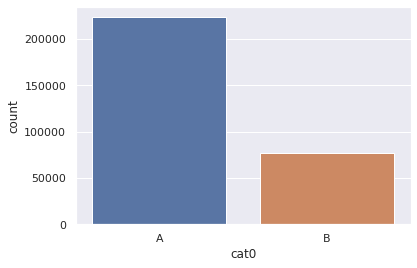

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat0", data=train_df)

In [ ]:
train_df.cat0.unique()

array(['A', 'B'], dtype=object)

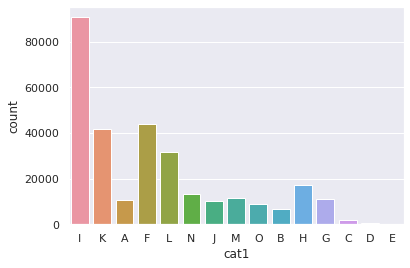

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat1", data=train_df)

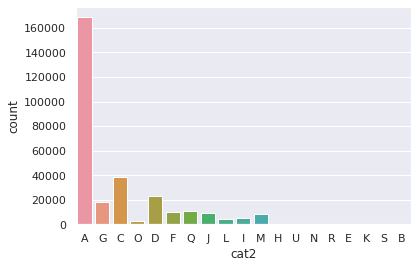

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat2", data=train_df)

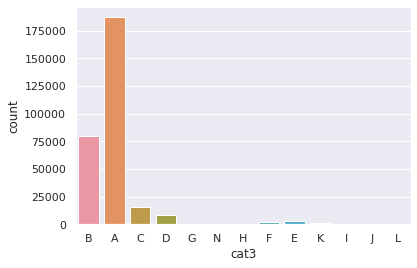

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat3", data=train_df)

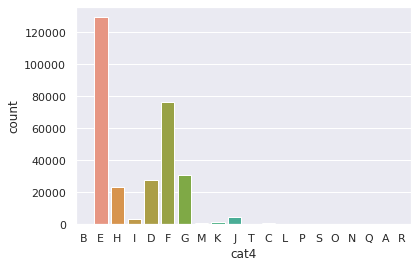

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat4", data=train_df)

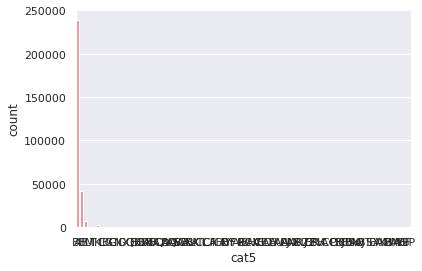

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat5", data=train_df)

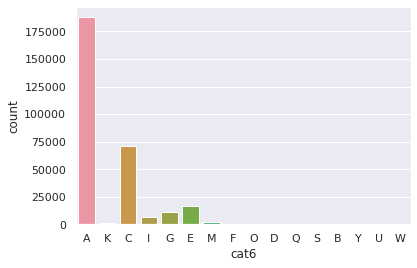

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat6", data=train_df)

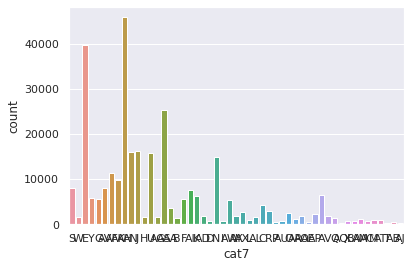

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat7", data=train_df)

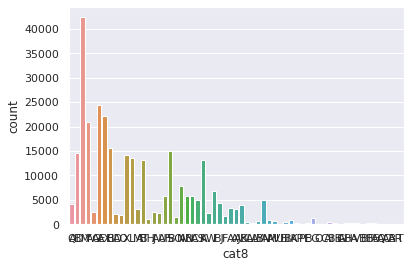

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat8", data=train_df)

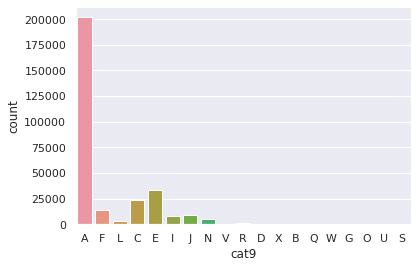

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat9", data=train_df)

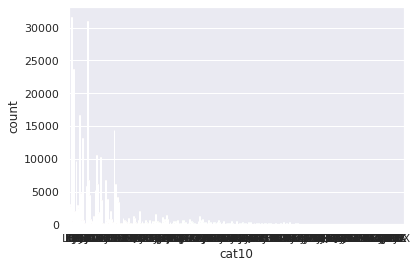

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="cat10", data=train_df)

In [ ]:
train_df.cat10.unique()

array(['LO', 'HJ', 'DJ', 'KV', 'DP', 'GE', 'HQ', 'HC', 'EK', 'GS', 'HG',
       'BY', 'HX', 'JK', 'FJ', 'LM', 'HK', 'MD', 'IG', 'JG', 'AN', 'AD',
       'MC', 'KW', 'CK', 'LF', 'CS', 'GK', 'DC', 'LB', 'FM', 'IH', 'LN',
       'IK', 'DF', 'IB', 'CB', 'LY', 'JW', 'FI', 'CR', 'IE', 'LE', 'HB',
       'HV', 'LG', 'BG', 'KP', 'LI', 'HL', 'BF', 'LU', 'O', 'GI', 'DQ',
       'IR', 'DV', 'HA', 'KB', 'FP', 'AT', 'IF', 'HN', 'GC', 'C', 'KC',
       'G', 'JA', 'CU', 'BC', 'AB', 'KF', 'MB', 'HE', 'BL', 'FQ', 'IA',
       'MJ', 'FO', 'V', 'JT', 'AU', 'IO', 'GQ', 'CC', 'JR', 'BM', 'HH',
       'AV', 'GT', 'I', 'IU', 'JN', 'EV', 'MV', 'EQ', 'LW', 'FN', 'IT',
       'AA', 'DK', 'IJ', 'GU', 'P', 'JH', 'CM', 'GA', 'R', 'LX', 'IX',
       'DY', 'D', 'FL', 'CP', 'GL', 'DI', 'CD', 'IV', 'FS', 'FR', 'J',
       'MP', 'MH', 'EL', 'JD', 'AP', 'AE', 'F', 'LC', 'BP', 'BI', 'MF',
       'DO', 'MG', 'MT', 'LD', 'CW', 'KS', 'BV', 'JV', 'BB', 'AM', 'KX',
       'FK', 'AH', 'LV', 'W', 'DU', 'FB', 'JX', 'KA', 'CO', '

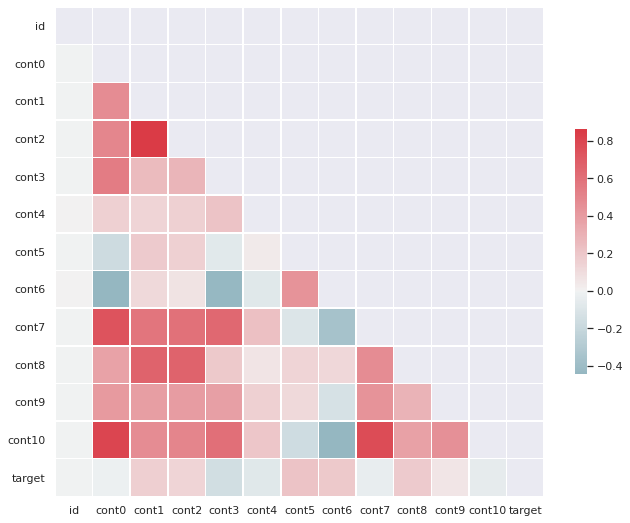

In [ ]:
import matplotlib.pyplot as plt

corr = train_df.corr()

#삼각형 마스크를 만든다.(위쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Heatmap 그리기 - mask and correct aspect ratio  사용
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_list = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11',	'cat12',	'cat13',	'cat14',	'cat15'	,'cat16'	,'cat17'	,'cat18']

for col in le_list:
  train_df[col] = le.fit_transform(train_df[col])
  test_le = list(le.classes_) + list(set(test_df[col].unique()) - set(train_df[col].unique()))
  le.fit(test_le)
  test_df[col] = le.transform(test_df[col])


In [ ]:
train_df.cat10.unique().size

299

In [8]:
train_df

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0,8,0,1,1,33,0,44,54,0,258,0,0,0,0,1,3,3,1,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,0,8,0,0,4,33,8,48,3,5,162,0,1,0,1,3,1,3,1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,0,10,0,0,4,33,0,30,38,9,69,0,1,0,0,1,3,3,1,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,0,10,0,2,4,33,0,50,3,5,241,0,0,0,0,1,3,3,1,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,0,8,6,1,4,33,2,32,54,0,75,0,0,0,1,1,1,3,1,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,0,13,5,0,4,45,0,19,48,0,159,0,0,0,1,3,1,3,1,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
299996,499995,0,10,0,0,6,33,0,36,4,4,163,0,1,0,1,1,3,3,1,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
299997,499996,0,6,12,0,7,33,2,37,43,0,156,1,0,0,1,3,1,3,3,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1
299998,499997,1,7,0,3,1,33,0,1,23,0,25,0,0,0,0,1,0,3,0,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0


In [9]:
train_x = train_df.loc[:, "cat0":"cont10"]
train_y = train_df['target']

test_x = test_df.loc[:, "cat0":"cont10"]

In [10]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## 모델 학습

###SVM

In [ ]:
#너무 계속 돌아가서 결과 값 확인 불가
from sklearn.svm import SVC 

svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(train_x,train_y) 
y_train_pred=svm.predict(train_x) 
y_test_pred=svm.predict(test_x) 

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred))  # train set의 accuracy ratio

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7, weights = "distance")
knn.fit(train_x, train_y)
train_pred_y = knn.predict(train_x)
test_pred_y = knn.predict(test_x)

### lightgbm

In [22]:
train_y.unique()

array([0, 1])

In [24]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    objective='binary',
    boosting='gbdt',
    #learning_rate = 0.05,
    #max_depth = 8,
    num_leaves = 31,
    #n_estimators = 400,
    #bagging_fraction = 0.8,
    #feature_fraction = 0.9)
    #reg_alpha = 0.2,
    #reg_lambda = 0.4
    )

lgb.fit(train_x, train_y)
ypred = lgb.predict(train_x)

In [25]:
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
from sklearn import metrics
print(metrics.accuracy_score(train_y, ypred))  # train set의 accuracy ratio

0.85121


In [30]:
test_pred_y = lgb.predict(test_x)

## 모델 예측

In [31]:
submit = pd.read_csv("sample_submission.csv")
submit

for i in range(len(test_pred_y)):
  submit["target"][i] = test_pred_y[i]

submit["target"] = submit["target"].astype(int)

submit.to_csv("submission.csv", index = False, header = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [33]:
!kaggle competitions submit -c tabular-playground-series-mar-2021 -f submission.csv -m  "LGBMClassifier"

100% 1.67M/1.67M [00:03<00:00, 579kB/s]
Successfully submitted to Tabular Playground Series - Mar 2021